# Importing Libraries

In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Data 

data used here is created manually

In [658]:
# creating Data with multiple axis and Labels
df = pd.DataFrame({'axis 1':[1,4,6,3,2.5,3.3,1.8,12,10,13,11,17,14],
                   'axis 2':[20,30,20.35,21,25,21,20,11,9,13,12,10,10],
                   'axis 3':[0.08,0.073,0.064,0.092,0.084,0.079,0.18,0.75,0.32,0.43,0.65,0.35,0.64],
                   'Label':[1,1,1,1,1,1,1,0,0,0,0,0,0]})
df

,axis 1,axis 2,axis 3,Label
0,1.0,20.00,0.080,1
1,4.0,30.00,0.073,1
2,6.0,20.35,0.064,1
3,3.0,21.00,0.092,1
4,2.5,25.00,0.084,1
5,3.3,21.00,0.079,1
6,1.8,20.00,0.180,1
7,12.0,11.00,0.750,0
8,10.0,9.00,0.320,0
9,13.0,13.00,0.430,0


# Data Preprocessing

In [664]:
# random weight intializationn with low values
weights = np.random.randn(3)*1e-04

# bais is taken as 1
bais = 1


In [665]:
# Data Normalization...
inputs = np.asarray(df.iloc[:,0:3])
inputs[:,0] = (inputs[:,0]-min(inputs[:,0]))/(max(inputs[:,0])-min(inputs[:,0]))
inputs[:,1] = (inputs[:,1]-min(inputs[:,1]))/(max(inputs[:,1])-min(inputs[:,1]))
inputs[:,2] = (inputs[:,2]-min(inputs[:,2]))/(max(inputs[:,2])-min(inputs[:,2]))

# Model Function

In [666]:

def model_training(df,inputs,weights,bais,eta=0.02):
    # intializing the necessary variables....
    # displaying the starting weights..
    print('Initial weights : ',weights,'\n')
    l=[]
    acc = []
    count=1
    print('Model Training Started......')
    time.sleep(2)
    print()
    
    # model Training with 210 epochs....
    for i in range(210):   
        val = [sum(i) for i in (inputs*weights)+ bais]
        
        y_pred = 1/(1+np.exp(-np.array(val)))
        y_act = np.asarray(df['Label'])
        loss = sum(((y_act-y_pred)**2)/2)
        
        # weights and bais updation...
        weights[0] = weights[0] - eta*inputs[:,0].mean()
        weights[1] = weights[1] - eta*inputs[:,1].mean()
        weights[2] = weights[2] - eta*inputs[:,2].mean()
        bais = bais - 0.002*1
        
        print('epoch {}'.format(i),'==========================================')
        print('Loss : ',loss)
        l.append(loss)
        time.sleep(0.1)
    
    print('current weights : ',weights)
    print('current bais : ',bais)
    

    return (weights,bais,l)

# Model Evaluation

In [667]:
weights,bais,loss = model_training(df,inputs,weights,bais)

Initial weights :  [ 3.41583793e-05 -3.03379606e-05  3.64489073e-04] 

Model Training Started......

epoch 0 ==========================================
Loss :  2.730133488073286
epoch 1 ==========================================
Loss :  2.725845294886653
epoch 2 ==========================================
Loss :  2.7214942727706752
epoch 3 ==========================================
Loss :  2.7170796982870002
epoch 4 ==========================================
Loss :  2.712600846769555
epoch 5 ==========================================
Loss :  2.7080569926190874
epoch 6 ==========================================
Loss :  2.7034474096097023
epoch 7 ==========================================
Loss :  2.698771371207673
epoch 8 ==========================================
Loss :  2.6940281509027595
epoch 9 ==========================================
Loss :  2.6892170225523033
epoch 10 ==========================================
Loss :  2.6843372607383325
epoch 11 ===================================

epoch 104 ==========================================
Loss :  1.858462774951319
epoch 105 ==========================================
Loss :  1.8461502671126702
epoch 106 ==========================================
Loss :  1.8338057924676208
epoch 107 ==========================================
Loss :  1.8214320382349585
epoch 108 ==========================================
Loss :  1.8090317487504377
epoch 109 ==========================================
Loss :  1.7966077245226009
epoch 110 ==========================================
Loss :  1.7841628212093152
epoch 111 ==========================================
Loss :  1.7716999485147233
epoch 112 ==========================================
Loss :  1.7592220690064675
epoch 113 ==========================================
Loss :  1.7467321968531928
epoch 114 ==========================================
Loss :  1.7342333964825043
epoch 115 ==========================================
Loss :  1.7217287811597095
epoch 116 ===============================

epoch 207 ==========================================
Loss :  0.9846438596886337
epoch 208 ==========================================
Loss :  0.9846259714508574
epoch 209 ==========================================
Loss :  0.9848058231477758
current weights :  [-1.72842738 -1.62079957 -1.39367005]
current bais :  0.5799999999999996


Text(0, 0.5, 'Loss')

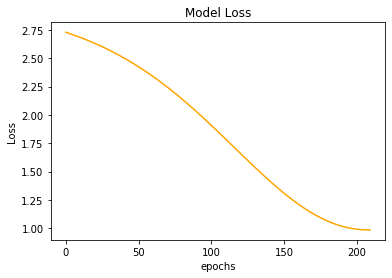

In [668]:
plt.plot(loss,color='orange')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

In [669]:
print('Current weights : ',weights)
print('Current Bais : ',bais)
print('Initial Loss :',loss[0])
print('Current Loss : ',loss[-1])

Current weights :  [-1.72842738 -1.62079957 -1.39367005]
Current Bais :  0.5799999999999996
Initial Loss : 2.730133488073286
Current Loss :  0.9848058231477758
